<center><h1><b>Марков Александр</b></h1><h3>Лаб. 1 🐕</h3></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Дан набор данных

In [2]:
data = (
    np.array([
        (1.1, -0.3),
        (-1.5, 3.3),
        (0.8, 0.4),
        (4.1, -2.2),
        (2.5, 2.5),
        (-1.2, 0.6)
    ]),
    np.array([1, 0, 1, 1, 0, 1])
)

In [3]:
X, y = data

Напишем функцию для обновления весов по модели Розенблата

In [4]:
def update_weights(weights, bias, lr, y, y_hat, x_i):
    weights += lr * (y - y_hat) * x_i
    bias += lr * (y - y_hat)
    
    return weights, bias

Напишем функцию для обучения модели

In [5]:
def fitting(X, y, epoches=5, lr=0.8):

    # проинициализируем веса
    weights = np.random.rand(len(X[0]))
    bias = np.random.rand()

    # для красивого графика после каждой эпохи будем
    # сохранять веса
    history_weights = []

    # само обучение
    for epo in range(epoches):
        for x_i, y_i in zip(X, y):
            y_hat = np.dot(x_i, weights) + bias  # взвешенная сумма
            y_hat = 1 if y_hat>=0 else 0  # функция Хевисайда как функция активации
            weights, bias = update_weights(weights, bias, lr, y_i, y_hat, x_i)

        history_weights.append([weights, bias])
        print(f"#{epo+1}:\t weights: {weights},\tbias: {bias}")
    
    return history_weights

In [6]:
history_weights = fitting(X, y)

#1:	 weights: [ 1.16112257 -1.72839906],	bias: 0.9504562567496236
#2:	 weights: [ 0.20112257 -1.24839906],	bias: 1.7504562567496236
#3:	 weights: [ 0.20112257 -1.24839906],	bias: 1.7504562567496236
#4:	 weights: [ 0.20112257 -1.24839906],	bias: 1.7504562567496236
#5:	 weights: [ 0.20112257 -1.24839906],	bias: 1.7504562567496236


Построем график с разделением классов

[]

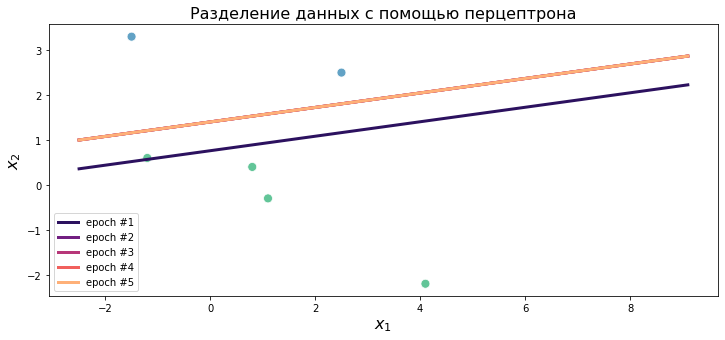

In [7]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Разделение данных с помощью перцептрона")

sns.scatterplot(x=X[:, 0], y=X[:, 1], s=80,
                c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in y])

palette = sns.color_palette("magma", len(history_weights))

for epoch, item in enumerate(history_weights):
    w, bias = item
    x2 = -bias/w[1] - domain*w[0]/w[1]
    sns.lineplot(x=domain, y=x2, label=f"epoch #{epoch+1}", linewidth=3, color=palette[epoch])
        
plt.legend()
plt.plot()

Теперь зададим случайным образом три точки и классифицируем их

In [13]:
rand_points = np.random.rand(3, 2) * 5
rand_points

array([[0.28008059, 0.9610029 ],
       [3.51692819, 0.58153335],
       [1.70356471, 4.98723874]])

In [14]:
weights, bias = history_weights[-1]

result = rand_points @ weights + bias
result[result < 0] = 0
result[result > 0] = 1

result

array([1., 1., 0.])

Видим, что две точки из сгенерированных классифицированы моделью как принадлежащие к классу `1`, а одна точка как принадлежащая к классу `0`. Проверим это визуально

> разумеется, если запустить этот код еще раз, то результат может быть другим

[]

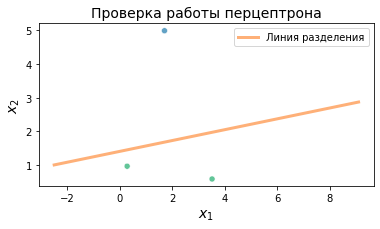

In [15]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 14, 'axes.titlesize': 14}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(6, 3))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Проверка работы перцептрона")
palette = sns.color_palette("magma", len(history_weights))

w, bias = history_weights[-1]
x2 = -bias/w[1] - domain*w[0]/w[1]
sns.lineplot(x=domain, y=x2, label=f"Линия разделения", linewidth=3, color=palette[-1])

sns.scatterplot(x=rand_points[:, 0], y=rand_points[:, 1], c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in result])
        
plt.legend()
plt.plot()